<a href="https://colab.research.google.com/github/joselra98/Data-Project4/blob/main/Data_Project_4_Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA PROJECT 4**



# **Cargar Imagenes Dicom**


In [ ]:
#Dependecias necesarías para la carga de datos
!pip install kaggle
!pip install pydicom
!pip install fastai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 7.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Cargar imagenes desde Kaggle a través del Kaggle.json 
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [ ]:
mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Descargamos los datos de la competición de Kaggle
path = !kaggle competitions download -c edemdataproject4

In [ ]:
!unzip edemdataproject4.zip

Archive:  edemdataproject4.zip
  inflating: sample_submission.csv   
  inflating: test/1.2.826.0.1.3680043.8.498.60964782211363234805993194732570333546.dcm  
  inflating: test/1.2.826.0.1.3680043.8.498.61431034517465531958162912253173088073.dcm  
  inflating: test/1.2.826.0.1.3680043.8.498.62775586541135359915919720866789455246.dcm  
  inflating: test/1.2.826.0.1.3680043.8.498.66090421685182342980503431575556713055.dcm  
  inflating: test/1.2.826.0.1.3680043.8.498.67789794435741873870140624318123072500.dcm  
  inflating: test/1.2.826.0.1.3680043.8.498.68178124482700344734822346753000091962.dcm  
  inflating: test/1.2.826.0.1.3680043.8.498.69780693352510167266847316539821108215.dcm  
  inflating: test/1.2.826.0.1.3680043.8.498.71414931266984795263697005963391289642.dcm  
  inflating: test/1.2.826.0.1.3680043.8.498.71446631430051241458602990266940324877.dcm  
  inflating: test/1.2.826.0.1.3680043.8.498.72016401052462335241200397926602631772.dcm  
  inflating: test/1.2.826.0.1.3680043.8.4

/usr/local/lib/python3.7/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:239: UserWarning: The (0028,0101) 'Bits Stored' value (15-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({bits_stored}-bit) "


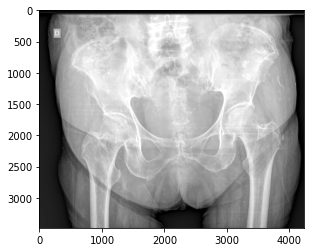

In [ ]:
# Cargamos las imagenes Dicom

from pathlib import Path
import pydicom
import numpy as np
from matplotlib import pyplot as plt

def load_image(sample_path):
    ds = pydicom.dcmread(sample_path)
    img = ds.pixel_array
    p01 = np.percentile(img.ravel(), 1)
    p99 = np.percentile(img.ravel(), 99)
    img[img > p99] = p99
    img[img < p01] = p01
    if ds.data_element('PhotometricInterpretation').value == 'MONOCHROME1':
        img = np.invert(img)
    img = (img - img.min()) / (img.max() - img.min())
    return img

sample_path = Path('/content/train/1.2.826.0.1.3680043.8.498.10036150326276641158002573300029848125.dcm')
img = load_image(sample_path)
plt.imshow(img, cmap='gray')

In [ ]:
#Eliminamos el zip del proyecto
%rm edemdataproject4.zip

# **Convertir las Imagenes en JPG**

In [ ]:
#Importamos las librerías necesarias para hacer la tranformación a JPG 
import cv2
import os
import pydicom

In [ ]:
#Cargamos las imagenes Dicom
def load_image(sample_path):
    ds = pydicom.dcmread(sample_path)
    img = ds.pixel_array
    p01 = np.percentile(img.ravel(), 1)
    p99 = np.percentile(img.ravel(), 99)
    img[img > p99] = p99
    img[img < p01] = p01
    if ds.data_element('PhotometricInterpretation').value == 'MONOCHROME1':
        img = np.invert(img)
    img = (img - img.min()) / (img.max() - img.min())
    return img

In [ ]:
#Creamos las carpetas para guardas las imagenes tranformadas 
os.mkdir ("train-png")
os.mkdir ("test-png")

In [ ]:
#Convertimos las imagenes Dicom del Train a JPG 
imputdir = '/content/train/'
outdir = '/content/train-png/'

test_list = [ f for f in  os.listdir(imputdir)]

count=0

for f in test_list:
    ds = load_image(imputdir + f) # read dicom image
    cv2.imwrite(outdir + f.replace('.dcm','.jpg'),(ds*255).astype('uint8')) # write jpeg image
    count+=1
    print(count)


/usr/local/lib/python3.7/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:239: UserWarning: The (0028,0101) 'Bits Stored' value (15-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({bits_stored}-bit) "


1
2
3
4
5
6


KeyboardInterrupt: ignored

In [ ]:
#Convertimos las imagenes Dicom del Test a JPG 
imputdir = '/content/test/'
outdir = '/content/test_png/'

test_list = [ f for f in  os.listdir(imputdir)]

for f in test_list:
    ds = load_image(imputdir + f) # read dicom image
    cv2.imwrite(outdir + f.replace('.dcm','.jpg'),(ds*255).astype('uint8')) # write jpeg image

In [ ]:
#Descargar Archivos Zip
import shutil
shutil.make_archive("test", 'zip', "/content/test_png") 

In [ ]:
#Descargar Archivos Zip
shutil.make_archive("train", 'zip', "/content/train-png") 

'/content/train.zip'

In [ ]:
#Eliminar los archivos orginales con las imagenes Dicom
%rm -rf train
%rm -rf train-png
%rm -rf test
%rm -rf test-png